# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be wrangling (and analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
The focus of this project is on the assessing and cleaning stages.

In [1]:
# importing the necessary packages

import pandas as pd
import numpy as np
import requests as rq
import tweepy as tw
import json as js
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gathering'></a>
## Data Gathering

The first step is to gather **all** three pieces of data for this project and load them in the notebook. 

>**Note:** the methods required to gather each data are different and as follows:

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


We have downloaded the WeRateDogs twitter archive data, now lets read it into a `pandas` dataframe

In [2]:
# reading into pandas dataframe

archives_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Now let's use the Requests library to download the tweet image prediction (image_predictions.tsv). Then we will open it as a binary file so that we are able to write and edit it.

We will then read it into a pandas dataframe

In [3]:
# downloading tweet image prediction file using requests library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = rq.get(url)

# saving HTML to file

with open('image_predictions.tsv', mode = 'wb') as image_file:
    image_file.write(response.content)

In [4]:
# reading to pandas dataframe

images_df = pd.read_csv('image_predictions.tsv', sep='\t')

Finally, let's use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

We will:

1. Query the twitter API for JSON data for each tweet ID in the twitter archive. 

In [7]:
# querying the twitter API


consumer_key = 'CONSUMER_KEY'
consumer_secret = 'SECRET_KEY'
access_token = 'ACCESS_TOKEN'
access_secret = 'ACCESS_SECRET'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth)

In [6]:
tweet_ids = archives_df.tweet_id.values
len(tweet_ids)

#Querying twitter API for JSON data for each tweet ID in the twitter archive
count = 0
fails_dict = {}
start = timer()

#save each tweets' returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run beacuse of Twitters rate limit
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        
        try:
            tweetS = api.get_status(tweet_id, tweet_mode = 'extended')
            print("successful")
            
            js.dump(tweetS._json, outfile)
            outfile.write('\n')
            
        except Exception as e:
            print("Failed")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
successful
2: 892177421306343426
successful
3: 891815181378084864
successful
4: 891689557279858688
successful
5: 891327558926688256
successful
6: 891087950875897856
successful
7: 890971913173991426
successful
8: 890729181411237888
successful
9: 890609185150312448
successful
10: 890240255349198849
successful
11: 890006608113172480
successful
12: 889880896479866881
successful
13: 889665388333682689
successful
14: 889638837579907072
successful
15: 889531135344209921
successful
16: 889278841981685760
successful
17: 888917238123831296
successful
18: 888804989199671297
successful
19: 888554962724278272
successful
20: 888202515573088257
Failed
21: 888078434458587136
successful
22: 887705289381826560
successful
23: 887517139158093824
successful
24: 887473957103951883
successful
25: 887343217045368832
successful
26: 887101392804085760
successful
27: 886983233522544640
successful
28: 886736880519319552
successful
29: 886680336477933568
successful
30: 886366144734445568
succ

In [5]:
# Extracting twitter_id, favourite count, retweet count from the .txt file

file_1 = open('tweet_json.txt', 'r')
Lines = file_1.readlines()

count = 0
i_d = []
like = []
retweet = []

for line in Lines:
    count += 1
    res = js.loads(line)
    i_d.append(res['id'])
    like.append(res['favorite_count'])
    retweet.append(res['retweet_count'])
    

In [6]:
# converting the extracted twitter id, favourite_count, retweet_count to dataframe

api_df = pd.DataFrame( {'tweet_id': i_d,
                              'favorite_count': like,
                              'retweet_count': retweet })

<a id='assessing'></a>
## Assessing Data

In this section, we will use visual and  programmatic assessment to detect and document at least **eight (8) quality issues and two (2) tidiness issue** found in the three datasets.

We will carry out visual then programmatic assessment for each indivuadual data set starting with the `archives_df` followed by `images_df` and finally `api_df`. At the end of the assessment, we will compile a list of the 8 quality and 2 tidiness issues we detected into one list. Then we will start the cleaning phase.


>**Note**: There are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. The project requires that we analyze a dataset with original ratings only(no retweets), that have images.

Now let's assess the three datasets. We will be looking out for quality and tididness issues.


#### 1. Visual assessment - archives_df

First, we look at the archives_df table

In [7]:
# printing out the first 10 rows in the archives_df table

archives_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# looking at how many rows and columns this table contains

archives_df.shape

(2356, 17)

##### Findings

The `archives_df` table contains 2356 rows and 17 columns

Some of the most notable issues at first glance are:

- Missing values (NaN) in the in_reply(id, status) and retweet(id, status)
- Some rows in the Name column are missing (None)
- The last four columns(doggo, floofer, pupper, puppo) have a lot of missing or perhaps misreprerented values.
- The last four columns should also be joined to form one column

When we open this table in google sheets to look for more issues with the data, the following issues are noticed while scrolling through.

1. Invalid dog names in the name columns e.g a, the, not.
2. Some  of the tweets are retweets and replies. (project requires original tweets only)
3. Some rating values are not properly extracted from the tweet's text e.g 13.5 extracted as 5

Now let's assess the archives_df programaticaly to:
1. Confrim the above discoveries
2. Detect other issues.

#### 2. Programmatic assessment - archives_df

In [9]:
archives_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Findings

> some columns (`in_reply_to_status_id` `in_reply_to_user_id` `retweeted_status_id` `retweeted_status_user_id` `retweeted_status_user_id` `retweeted_status_timestamp` `expanded_urls`) have less row count than the total `2356`. This indicates **missing data**

> The `tiemstamp` column has the wrong datatype

Now let's confirm if this dataset has retweets and replies.

In [10]:
# checking for retweets

archives_df[archives_df['retweeted_status_id'].isnull()== False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


The assessment above shows the dataset has 181 rows of retweets

Now let's assess for replies

In [11]:
# checking for replies

archives_df[archives_df['in_reply_to_status_id'].isnull()== False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


The dataset has 78 rows of replies

Let's confirm is some ratings weren't properly extracted

In [12]:
archives_df[archives_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/home/samtsuma/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


We have `6 rows` whose ratings were not well extracted from the tweets as seen in the assessment above.

>**Note**: This also  means that the `rating_numerator` column datatype is to be converted to float

In [13]:
# checking for duplicates

archives_df.duplicated().sum()

0

#### Findings

> The table has no duplicates

Finally, lets look at the `name` column of the archive_df for any missing values
We'll use the `isnull()` method to check for rows with no names. Then we'll sample out a list of names to have an overview.

In [14]:
# looking for missing values

archives_df[archives_df['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In light of the above cell output, let's look at some sample names

In [15]:
# sampling out to see if names are misrepresented

archives_df.name.sample(15)

1820    Bubbles
581     Sampson
1222     Travis
1070      Chase
1077       None
1340          a
692        Carl
1522      Hazel
364     Malcolm
686          Bo
2309    Jockson
1330       None
267       Penny
2185       Ruby
126      Cooper
Name: name, dtype: object

> **Note**: The `isnull()` method shows there are no missing values for the name column and yet when we sample out we get some values represented as `None`

We can conclude that some names (e.g `a`) are invalid and others are misrepresented.
 

Now let's look at the images-predictions table


### 1. Visual assessment - images_df



First, we look at the images_df table

In [16]:
images_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
images_df.shape

(2075, 12)

##### Findings

The `images_df` table contains 2075 rows and 12 columns

Some of the most notable issues at first glance are:

1. Unlike the other two tables, the images_df data is in ascending order of the tweet_ids.


### 2. Programmatic assessment - images_df

In [18]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The dataset seems to have no missing values, and its datatypes are correct.

Let's look for duplicates

In [19]:
# checking for duplicates

print(images_df.duplicated().sum())

0


Dataset has no duplicates.

And now for some summary statistics

In [20]:
# summary statistics

images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The images_df dataframe seems to be in good shape, except for the **tweet_id** order

Finaly, we look at the api_df dataframe


### 1. Visual assessment - api_df

In [21]:
# looking at data gathered from the API

api_df.head(10)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33777,6993
1,892177421306343426,29295,5293
2,891815181378084864,22032,3471
3,891689557279858688,36890,7216
4,891327558926688256,35274,7743
5,891087950875897856,17787,2595
6,890971913173991426,10350,1656
7,890729181411237888,56794,15729
8,890609185150312448,24494,3613
9,890240255349198849,27918,6086


A visual assessment done on google sheets shows no quality issues with this dataframe.

Let's see if programmatic assessment will unfold any unseen issue.


### 2. Programmatic assessment - api_df

In [22]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [23]:
api_df.shape

(2327, 3)

#### Findings

The api_df dataframe has `2327` rows and `3` columns.

There are no missing values and the datatype for each column is correct.

In [24]:
# checking for duplicates

print(api_df.duplicated().sum())

0


In [25]:
# summary statistics

api_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7045.382896,2467.058444
std,6.820795e+16,10948.763910,4177.738817
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1223.500000,493.500000
50%,7.178418e+17,3047.000000,1148.000000
75%,7.986547e+17,8592.500000,2855.500000
max,8.924206e+17,144693.000000,70599.000000


The dataframe has no duplicates and its summary statistics seem to be in order

`api_df` is in good quality

Let's now compile all issues from the above assessment


### Quality issues

1. `archives_df`: Some  of the tweets are retweets and replies. (project requires original tweets only)

2. `archives_df`:  Missing values (NaN) in the in_reply_to_(id, status) and retweet_status_(id, user_id, timestamp) and expanded_urls columns

3. `archives_df`: Invalid dog names in the name columns e.g a, the, not. and some names are missing(none)

4. `archives_df`: Misrepresentation of missing names in the **name** column. (None instead of empty strings)

5. `archives_df`: Misrepresentation of null values in the floofer, doggo, pupper and puppo columns. (None instead of empty strings)

6. `archives_df`: Incorrect datatype for timestamp and rating_numerator columns

7. `archives_df`: Some rating values are not properly extracted from the tweet's text e.g 13.5 extracted as 5

8. `image-predictions table`:tweet_id is in ascending order & isn't consistent with other dataframes




### Tidiness issues

1. `archives_df`: The doggo, floofer, pupper and puppo columns should form one column

2. `merge` all three dataset should be mergerd to one.

<a id='cleaning'></a>
## Cleaning Data
In this section, we will clean **all** of the issues we documented while assessing. 

**Note:** We will first make a copy of the original data before cleaning. Then we will address every single quality issue in our data and finally merge the individual pieces of data to obtain **tidy data**.
The result will be a high-quality and tidy master pandas DataFrame.

Let's make a copy of each dataframe

In [26]:
# Make copies of original pieces of data

archives_clean = archives_df.copy()
images_clean = images_df.copy()
api_clean = api_df.copy()

### Quality Issues

>**Note**: Since the project requires that we work with original tweets only, we will first remove all rows with retweets and replies, then we will address missing values

### Issue #1: Some  of the tweets are retweets and replies.

#### Define

Let's drop the rows that have either retweeted_status_id (for retweets) or in_reply_to_status_id (for replies)

Then we will reset the dataframe's index

#### Code

In [27]:
#dropping retweets and replies

archives_clean.drop(archives_clean[(archives_clean['retweeted_status_id'].isnull()== False)].index, inplace=True)
archives_clean.drop(archives_clean[(archives_clean['in_reply_to_status_id'].isnull()== False)].index, inplace=True)

In [28]:
# resetting index

archives_clean.reset_index(drop=True, inplace=True)

#### Test

In [29]:

archives_clean[archives_clean['retweeted_status_id'].isnull()== False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:

archives_clean[archives_clean['in_reply_to_status_id'].isnull()== False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

We have successfully dropped the rows with retweets and replies. The `.info()` method above shows we have lesser rows in each column (2097) than the original dataframe and that the retweeted and reply status ID colimns have no values.

Now let's handle the missing values




### Issue #2: Missing values (NaN) in the in_reply_to_(id, status) and retweet_status_(id, user_id, timestamp) and expanded_urls columns

#### Define:
>**Note**: We have no way of accessing missing data for the rows in the above named columns. Since we won't need these columns for our analysis, we will drop them.

#### Code

In [32]:
# dropping columns


archives_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)


#### Test

In [33]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 180.3+ KB


As seen above, we have successfully dropped the columns and are remaining with 11 columns.

Now let's address invalid and misrepresented names in the `names` column

### Issue #3: Invalid dog names in the name columns e.g a, the, not, a

#### Define
>**Note**: All the invlaid names happen to be in lower case.

Based on the above insight, we will:

1. Create an empty list `Names`
2. Loop through the name column and append of all names starting with a capital letter into the `Names list.
3. For the names that don't satisfy the loop condition, we will assign the pandas Nan value and append to the `Names` list.
4. Create a pandas dataframe `names_df` from the `Names` list.
5. Replace the name column of the `archives_clean` dataframe with that of the `names_df` dataframe


#### Code

In [34]:
Names = []

for n in range(len(archives_clean['name'])):
    if archives_clean['name'][ n].islower() == False:
        names = archives_clean['name'][n]
        Names.append(names)
        
    elif archives_clean['name'][n].islower() == True:
        names = np.nan
        Names.append(names)
        
names_df = pd.DataFrame(Names, columns=['name'])

archives_clean['name'] = names_df['name']

#### Test

In [35]:
assert 'a' not in archives_clean.name

In [36]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                1993 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 180.3+ KB


> Notice the name column has less values. The empty `name` cells are represented as **"None"**.

### Issue #4: Misrepresentation of missing names in the `name` column. (`None` instead of pandas' `Nan`)

#### Define

Since we have no means of getting the dog names, we will use pandas `replace()` to replace all *None* names, assigning pandas Nan values in their place.

#### Code

In [37]:
#replace them with nan

archives_clean.name.replace('None', np.nan, inplace = True)

#### Test

In [38]:
assert "None" not in archives_clean.name

The test above shows we have successfully replaced the *None* names

In [39]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                1390 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 180.3+ KB


> Notice the name column has increasingly lesser values. The empty `name` cells are represented as Nan.

As seen below

In [40]:
# all names representes as NaN 

archives_clean[archives_clean['name'].isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,13,10,NaN,None,None,None,puppo
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,NaN,None,None,None,None
23,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,13,10,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,None,None,None,None
2093,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,None,None,None,None
2094,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,None,None,None,None
2095,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,None,None,None,None


We have `707` rows with name values represented as NaN

### Issue #5: Misrepresentation of null values in the floofer, doggo, pupper and puppo columns. (None instead of empty strings)

#### Define

We will:
1. Loop through the four columns and create a column Series object which will store the coulmns we are looping through
2. use pandas `replace()` to replace **None** with an empty string. This will make it more efficient to merge these columns 

#### Code

In [41]:
for column in archives_clean[['doggo', 'floofer', 'pupper', 'puppo']]:
    
    columnSeriesObj = archives_clean[column]
    columnSeriesObj.replace('None', '', inplace = True)

#### Test

In [42]:
archives_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,


Notice the columns' cells are now empty

### Issue #6: Incorrect datatype for timestamp and rating_numerator columns

#### Define

We will 
1. convert the  `timestamp` column datatype from **object** to **datetime64[ns]** using pandas `to_datetime` function.
2. convert the  `rating_numerator` column datatype from **int64** to **float** using pandas `astype` function.

#### Code

In [43]:
# coneverting timestamp datatype to datetime

archives_clean['timestamp'] = pd.to_datetime(archives_clean['timestamp']) 

# coneverting rating_numerator datatype to float

archives_clean['rating_numerator'] = archives_clean['rating_numerator'].astype('float')

#### Test

In [44]:
# checking datatypes

archives_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                  float64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

Convertion from object to timestamp datatype is successful as seen above

### Issue #7: Some rating values are not properly extracted from the tweet's text e.g 13.5 extracted as 5

#### Define

Being that we have converted the rating_numerator datatype, now we will:

1. Find the rows whose tweet ratings were wrongly extracted.
2. Use the row indices to assign the correct rating to each individual row as described in the tweet with pandas' `.at()`

#### Code

In [45]:
# rows with wrong rating extractions

archives_clean[archives_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/home/samtsuma/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,5.0
528,"This is Logan, the Chow who lived. He solemnly...",75.0
586,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1474,Here we have uncovered an entire battalion of ...,26.0


Notice we have lesser rows than we had when assessing, this is because some of the rows were either retweets or replies

Let's use the indices to assign the correct ratings as per the respective tweets.

In [46]:
# assigning the correct ratings with decimals

archives_clean.at[41, 'rating_numerator'] = 13.5
archives_clean.at[528, 'rating_numerator'] = 9.75
archives_clean.at[586, 'rating_numerator'] = 11.27
archives_clean.at[1474, 'rating_numerator'] = 11.26

#### Test

In [47]:
archives_clean[archives_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/home/samtsuma/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,This is Bella. She hopes her smile made you sm...,13.50
528,"This is Logan, the Chow who lived. He solemnly...",9.75
586,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1474,Here we have uncovered an entire battalion of ...,11.26


In [48]:
# test 2 for each individual row

print(archives_clean['rating_numerator'][41])
print(archives_clean['rating_numerator'][528])
print(archives_clean['rating_numerator'][586])
print(archives_clean['rating_numerator'][1474])

13.5
9.75
11.27
11.26


The tests above show we have successfuly assigned the correct ratings.

### Issue #8: tweet_id is in ascending order & isn't consistent with other dataframes in the image-predictions table

#### Define

Here, we will:

1. Sort the images_clean dataframe's `tweet_id` column in **descending** order using pandas' `.sort_values()`.

2. drop the original the dataframe's index and reset it such that it acends from 0 to the last row using pandas' `reset_index()`.

#### Code

In [49]:
images_clean.sort_values(by="tweet_id", ascending=False, inplace = True)

In [50]:
# checking to see if dataframe is sorted

images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


As seen above, the dataframe was sorted by tweet_id, however,the index is not well sorted

Let's drop the index and reset it

In [51]:
images_clean.reset_index(drop=True, inplace=True)

#### Test

In [52]:
images_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2071,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2072,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2073,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [54]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Now our dataset is well sorted.

### Tidiness Issues

Now let's handle the following tidiness issues:

1. `archives_df`: The doggo, floofer, pupper and puppo columns in the archives_df should form one column

2. `merge`: All 3 dataframes should be mergerd to form one record

### Issue #1: The doggo, floofer, pupper and puppo columns in the archives_df should form one column

#### Define

Here, we will:

1. Create a new column (`dog_stage`) made up of values from the `doggo`, `floofer`, `pupper` and `puppo` columns.

2. Check for any discrepancies from merging the dataframes

#### Code

In [55]:
archives_clean['dog_stage'] = archives_clean.doggo + archives_clean.floofer + archives_clean.pupper + archives_clean.puppo

#### Test

In [56]:
assert "dog_stage" in archives_clean.columns

Let's see if the dog stages were correctly derived

In [57]:
# checking for validity of dog stages

archives_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

#### Findings

As seen above, We have:

1. `1976` undocumented dog stages
2. Invalid dog stages e.g `doggo_pupper`, `doggofloofer` and `doggopuppo`

Let's address these issues

#### Issue #1.1: Invalid dog stages e.g doggo_pupper, doggofloofer and doggopuppo

and

#### Issue #1.2: The `1976` undocumented dog stages

#### Define

We will:

1. locate all each invalid dog stage using pandas `.loc[]` and replace each stage with the invalid dog stage's suffix e.g for `doggofloofer`, we will replace with `floofer` and so on.

>**Note**: The above dog stage value assignment may not be the best option as it may affect the analysis, giving wrong insights on the data. However, it is important the total number of invalid dog stages is significantly low.

2. Locate and replace all undocumented dog stages with pandas' **NaN**

3. Drop the `doggo`, `floofer`, `pupper` and `puppo` columns

In [58]:
# correcting invalid dog stages

archives_clean.loc[archives_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'floofer'
archives_clean.loc[archives_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'pupper'
archives_clean.loc[archives_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'puppo'

In [59]:
# replacing empty strings with pandas NaN

archives_clean.loc[archives_clean.dog_stage == '', 'dog_stage'] = np.nan

In [60]:
# dropping columns

archives_clean.drop(["doggo", "floofer", "pupper", "puppo"],axis = 1, inplace = True)

#### Test

In [61]:
archives_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN
...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10,NaN,NaN
2093,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6.0,10,NaN,NaN
2094,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9.0,10,NaN,NaN
2095,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7.0,10,NaN,NaN


In [62]:
# checking for validity of dog stages

archives_clean['dog_stage'].value_counts()

pupper     230
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

Now we only have valid dog stages and he columns have been successfully dropped.


In [63]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 131.2+ KB



>**Note**: The dog_stage column appears to have way lesser entires. This is because we replaced all null entries with pandas' NaN.

Now let's merge dataframes

### Issue #2: All 3 dataframes should be mergerd to form one record

#### Define

Let's use pandas' `.merge()` to merge the three dataframes into one (`clean_merge1`) dataframe.

We will first merge `archives_clean` and `api_clean` then finally `images_clean` and name the final dataframe `clean_merge1`

#### Code

In [64]:

clean_merge1 = archives_clean.merge(api_clean, on = 'tweet_id', how = 'left')
clean_merge1 = clean_merge1.merge(images_clean, on = 'tweet_id', how = 'left')

#### Test

In [65]:
clean_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   dog_stage           336 non-null    object             
 8   favorite_count      2089 non-null   float64            
 9   retweet_count       2089 non-null   float64            
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   float64            
 12  p1                  1971 non-null 

As seen above, we have successfully merged the three datasets. However we may have some few issues:

1. Since the `api_clean` and `images_clean` had lesser rows than `archives_clean` dataset, our merged dataset seems to have missing values.
2. The columns derived from the `images_clean` seem to have lesser rows(1972) than they had before being merged (2075). 
> **Note**: The assumption is that, it could have been because some of the tweet_ids for the images dataframe were as those we dropped earlier (retweets and reply IDs) and so we not merged to form the new dataframe.

Let's document and address this issue:

>**Note**: Some of the missing data especially extracted from the API cannot be acquired. This data is vital in our analysis and therefore we will drop all rows in the merged dataset that do not have the `favorite_count` and `retweet_count` columns.

As for the missing data from the other columns, we will fill it with **pandas Nan**.

### Quality

9. `clean_merge1`table:  Missing values in multiple rows of clean_merge1 dataframe

### Issue #9: Missing values in multiple rows of clean_merge1 dataset

#### Define

Since there are many empty cells in different columns, we will:

1. Affirm that we have missing values using the `favorite_count` column.
2. Drop all rows with missing values in the `favorite_count` and `retweet_count` columns 


Finally we will create a function that will:

1. Loop through all columns in the dataset
2. Replace any missing value with pandas `Nan`

#### Code

In [66]:
# affirmation for missing values

clean_merge1[clean_merge1['favorite_count'].isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
90,872261713294495745,2017-06-07 01:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,13.0,10,Harry,NaN,NaN,NaN,...,2.0,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
202,844704788403113984,2017-03-23 00:18:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,13.0,10,Luna,NaN,NaN,NaN,...,1.0,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True
234,837366284874571778,2017-03-02 18:17:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,13.0,10,Lucy,NaN,NaN,NaN,...,1.0,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
284,829374341691346946,2017-02-08 17:00:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,13.0,10,Astrid,doggo,NaN,NaN,...,1.0,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
575,779123168116150273,2016-09-23 01:00:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,12.0,10,Reggie,NaN,NaN,NaN,...,1.0,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True
687,759923798737051648,2016-08-01 01:28:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,10.0,10,NaN,NaN,NaN,NaN,...,1.0,Labrador_retriever,0.324579,True,seat_belt,0.109168,False,pug,0.102466,True
727,754011816964026368,2016-07-15 17:56:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,12.0,10,Charlie,NaN,NaN,NaN,...,1.0,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True
1488,680055455951884288,2015-12-24 16:00:30+00:00,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",10.0,10,Sammy,NaN,NaN,NaN,...,1.0,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True


As seen above, we have 8 rows that have missing values in their **favorite_count** column.

Now, let's drop these rows

In [67]:
#dropping rows with null values

clean_merge1 = clean_merge1.dropna(subset=['favorite_count', 'retweet_count'], how='all')

#### Test

In [68]:
# looking for missing values

clean_merge1[clean_merge1['favorite_count'].isnull()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
clean_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2089 non-null   int64              
 1   timestamp           2089 non-null   datetime64[ns, UTC]
 2   source              2089 non-null   object             
 3   text                2089 non-null   object             
 4   rating_numerator    2089 non-null   float64            
 5   rating_denominator  2089 non-null   int64              
 6   name                1383 non-null   object             
 7   dog_stage           335 non-null    object             
 8   favorite_count      2089 non-null   float64            
 9   retweet_count       2089 non-null   float64            
 10  jpg_url             1963 non-null   object             
 11  img_num             1963 non-null   float64            
 12  p1                  1963 non-null 

We have successfully dropped the rows

Finaly, let's fill the remaining null values using pandas Nan. These will be the `name` and `dog_stage` columns

>**Note**: We are left with way fewer `dog_stage` values than the average column-value count. It could heavily affect our analysis.

#### Code

In [70]:
# function to fill null values

def fillvalues(data):
    for col in clean_merge1.columns:
        data[col].fillna(np.nan, inplace=True)
        
fillvalues(clean_merge1)

#### Test

In [71]:
clean_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2096
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2089 non-null   int64              
 1   timestamp           2089 non-null   datetime64[ns, UTC]
 2   source              2089 non-null   object             
 3   text                2089 non-null   object             
 4   rating_numerator    2089 non-null   float64            
 5   rating_denominator  2089 non-null   int64              
 6   name                1383 non-null   object             
 7   dog_stage           335 non-null    object             
 8   favorite_count      2089 non-null   float64            
 9   retweet_count       2089 non-null   float64            
 10  jpg_url             1963 non-null   object             
 11  img_num             1963 non-null   float64            
 12  p1                  1963 non-null 

Now our dataset is in good shape, Let's save it to a csv file `twitter_archive_master`

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
clean_merge1.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, we will analyze and visualize our wrangled data and produce **three (3) insights and one (1) visualization.**

### Insights:
1. Average favourite count for each dog stage.

2. Average retweet count for each dog stage.

3. Average rating for each dog stage.

### 1: What is the average favorite count for each dog stage

In [73]:
clean_merge1.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo      16318.873239
floofer     9933.000000
pupper      6455.343478
puppo      20456.125000
Name: favorite_count, dtype: float64

The above analysis shows the `puppo` stage having the highest favourite count, followed by `doggo` then `floofer` and finally `pupper`.

### 2: What is the average retweet count for each dog stage

In [74]:
clean_merge1.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo      5512.985915
floofer    3277.800000
pupper     2064.778261
puppo      5857.666667
Name: retweet_count, dtype: float64

This analysis shows the `puppo` stage having the highest retweet count, followed by `doggo` then `floofer` and finally `pupper`

### 3. What rating numerator for each dog stage

In [75]:
clean_merge1.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.830986
floofer    11.800000
pupper     10.749000
puppo      12.041667
Name: rating_numerator, dtype: float64

This analysis shows the `puppo` stage has the highest dog rating, followed by `doggo` then `floofer` and finally the `pupper` stage.

Now let's plot our findings from the above insights 

### Visualization

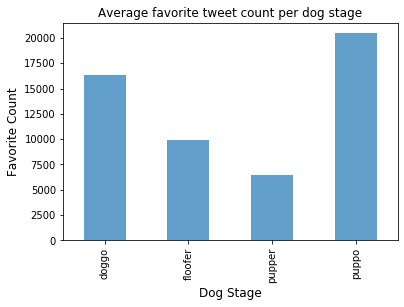

In [76]:
# plotting for dog stage against mean favorite count

fav_means =clean_merge1.groupby('dog_stage')['favorite_count'].mean()
fav_means.plot(kind='bar', title='Average favorite tweet count per dog stage', alpha=.7);
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Favorite Count', fontsize=12);

The plotting above confirms our findings. The `puppo` stage has the highest favourite count, followed by `doggo` then `floofer` and finally `pupper`.

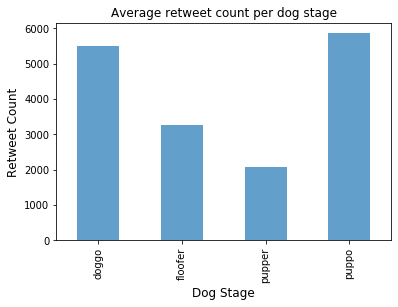

In [77]:
# plotting for dog stage against mean retweet count

retweet_means =clean_merge1.groupby('dog_stage')['retweet_count'].mean()
retweet_means.plot(kind='bar', title='Average retweet count per dog stage', alpha=.7);
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Retweet Count', fontsize=12);

As expected, the `puppo` stage has the highest retweet count, followed by `doggo` then `floofer` and finally `pupper`

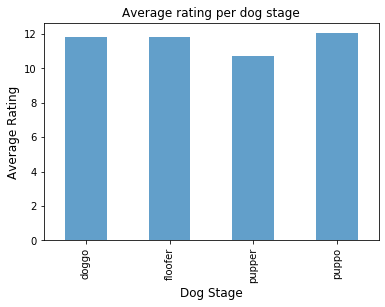

In [78]:
# plotting for dog stage against mean rating

rating_means =clean_merge1.groupby('dog_stage')['rating_numerator'].mean()
rating_means.plot(kind='bar', title='Average rating per dog stage', alpha=.7);
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Average Rating', fontsize=12);

Finally, the plotting above shows the `puppo` stage has the highest dog rating, followed by `doggo` then `floofer` and finally the `pupper` stage.`

<a id='conclusion'></a>
## Conclusion

Based on the analysis, the **puppo** is the most popular(`retweets`), most loved(`saved as favourite`) and highest rated dog(`ratings`), followed by the **doggo** and the **floofer** comes in third in popularity, ratings and favour. The **pupper** on the other hand doesn't seem to get as much attention as the three. 
We could conclude that most people adore puppos. 

The above conclusions may, however, not be all correct. This is because of limitations from the cleaning stage. 

#### Limitations

The following are the limitations drawn from the cleaning stage.


>**1**: There is a lot of missing data that cannot be acquired. This is the case all three datasets. The data in question happens to be vital in the analysis and so there is a chance our final findings aren't all correct .


>**#2**: During merging the dog stages, we are left with way fewer `dog_stage` values than the average column-value count. This may also have had an effect on our analysis.


>**3**: We also assigned dog stages to some rows that weren't well represented e.g "doggofloofer" instead of either "doggo" or "floofer". This dog stage value assignment may not have been the best option as it may have affected the analysis, giving wrong insights on the data. However, it is important to note that the total number of invalid dog stages was significantly low.



Given, better ways of handling these limitations would almost guarantee a cleaner dataset and consequently more accurate insights.